# Feature Enigneering

### 1 - Handling Missing Values

MCAR ( Missing Completely at Random ),  
MAR ( Missing at Random ),  
MNAR ( Missing data not  at Random )

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Checking missing values
df.isnull().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.shape

(891, 15)

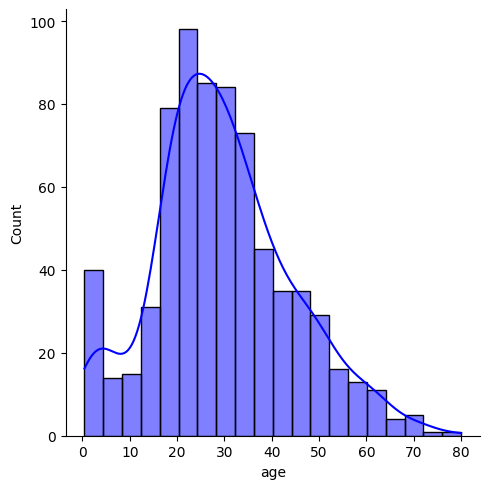

In [6]:
# To perform any action on the column, use "axis = 1"
# Imputation Technique -> how we are going to handle the missing values.

# 1- Mean Value Imputation -> replacing that value with the mean of that data.

sns.displot(df['age'], kde = True, color = 'Blue')

In [7]:
df["age_mean"] = df['age'].fillna(df['age'].mean())
df['age'].mean()
df[["age_mean", 'age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


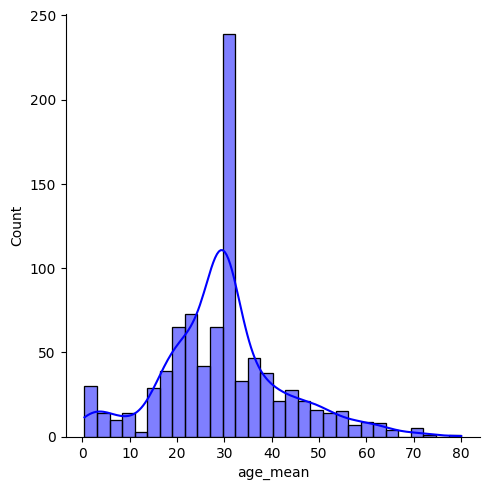

In [8]:
# Updated graph
sns.displot(df['age_mean'], color = 'Blue', kde = True)

In [9]:
# 2 - Median value Imputation
df['age_median'] = df['age'].fillna(df['age'].median())
df[['age_median', 'age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


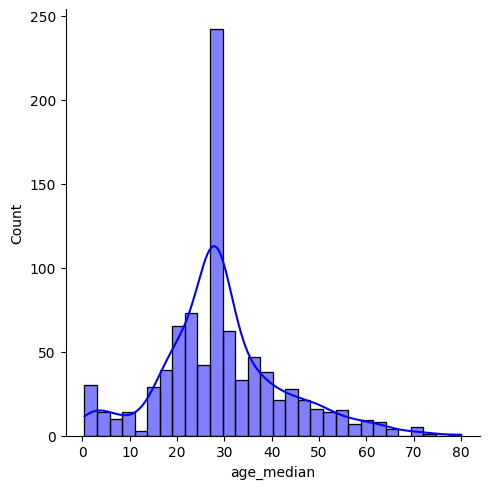

In [10]:
# Updated graph
sns.displot(df['age_median'], color = 'Blue', kde = True)

In [11]:
# Mode Imputation Technique -> Best for Categorical data
df['age_mode'] = df['age'].fillna(df['age'].mode())
df[['age_mode', 'age']]

,age_mode,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,NaN
889,26.0,26.0


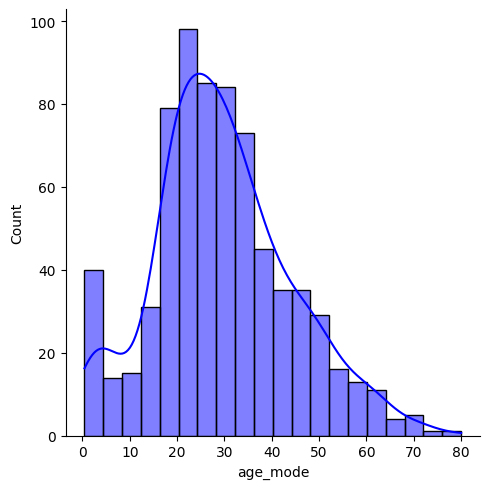

In [12]:
# Updated graph
sns.displot(df['age_mode'], kde = True, color = "Blue")

In [13]:
df[df['embarked'].isnull()]

# This embarked null value belongs to MCAR ( missing data completely at random ). because there is no relationship among them related to embarked.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,age_mode
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0


In [14]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
df[df['embarked'].notna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,age_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0,26.0


In [16]:
mode_val = df[df['embarked'].notna()]['embarked'].mode()[0]
mode_val

'S'

In [17]:
# Now replacing Nan values with Mode value
df['embarked_mode'] = df['embarked'].fillna(mode_val)
df[['embarked', 'embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [18]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [19]:
df['embarked'].isnull().sum()

np.int64(2)

# Handling Imbalanced Dataset

1 - Up Sampling,  
2 - Down Sampling

In [20]:
import random
import sklearn

np.random.seed(123)
# Seeding is important because it initializes the random number generator to a know state, allowing the same sewuence of random numbers to be reproduced.
# Basically we set the seed to a particular value and then when we generate any random number, we get that same number all the time.
# # The random should be of Python itself, not of numpy library.

In [21]:
random.seed(100)
print(random.randint(1, 100))

19


In [22]:
np.random.seed(123)
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [23]:
n_class_0, n_class_1

(900, 100)

In [24]:
# Creating an imbalanced dataset
class_0 = pd.DataFrame({
    'Feature_1' : np.random .normal(loc = 0, scale = 1, size = n_class_0),
    'Feature_2' : np.random .normal(loc = 0, scale = 1, size = n_class_0),
    'target' : [0] * n_class_0
})

class_1 = pd.DataFrame({
    'Feature_1' : np.random .normal(loc = 2, scale = 1, size = n_class_1),
    'Feature_2' : np.random .normal(loc = 2, scale = 1, size = n_class_1),
    'target' : [1] * n_class_1
})

In [25]:
df = pd.concat([class_0, class_1]).reset_index(drop = True)

In [26]:
df.head()

,Feature_1,Feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [27]:
df.tail()

,Feature_1,Feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [28]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [29]:
## upsampling 
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [30]:
from sklearn.utils import resample
df_minority_upsample = resample(df_minority, replace = True,
        n_samples = len(df_majority),
        random_state = 40)

In [31]:
df_minority_upsample.shape

(900, 3)

In [32]:
df_minority_upsample.head()

,Feature_1,Feature_2,target
970,1.868760,0.451235,1
991,3.701608,2.160889,1
907,1.108410,0.823152,1
937,1.068404,3.343388,1
956,2.378737,2.984827,1


# 5 number summary and box plot

In [33]:
marks = [45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74]
mini, q1, median, q3, maxi = np.quantile(marks, [0, 0.25, 0.50, 0.75, 1.0])

In [34]:
mini, q1, median, q3, maxi

(np.float64(32.0),
 np.float64(54.0),
 np.float64(67.0),
 np.float64(89.0),
 np.float64(99.0))

In [35]:
# computing the outlier
iqr = q3-q1
iqr

np.float64(35.0)

In [36]:
lower_fence = q1 - 1.5*(iqr)
higher_fence = q3 + 1.5*(iqr)

In [37]:
lower_fence, higher_fence

(np.float64(1.5), np.float64(141.5))

<Axes: >

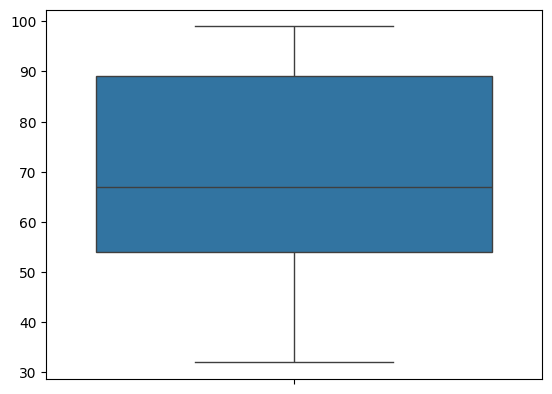

In [38]:
sns.boxplot(marks)

<Axes: >

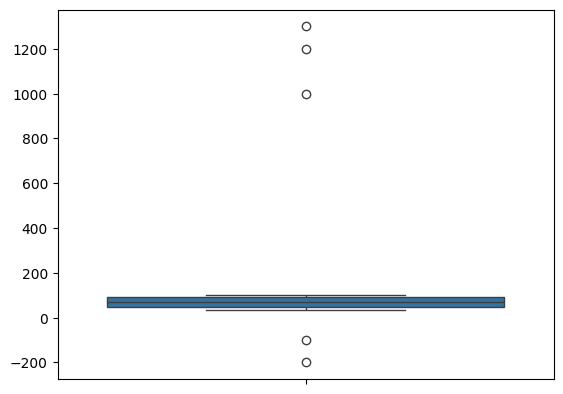

In [39]:
marks_1 = [45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74, 1000, 1200, 1300, -100, -200]
sns.boxplot(marks_1)

# Data Encoding

### 1. OHE Encoding -> assigns unique vector to each category.

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
df = pd.DataFrame({
    'Color' : ['red', 'blue', 'green', 'green', 'red', 'blue']
})
print(df)

   Color
0    red
1   blue
2  green
3  green
4    red
5   blue


In [49]:
# create an instance of one hot encoder
encoder = OneHotEncoder()

# fit and transform
encoded_val = encoder.fit_transform(df[['Color']]).toarray()

# the numbers are categorised in alphabetical order....blue is the sortest therefore the 1 is at first place and so the others....
encoded_val

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [51]:
encoded_df = pd.DataFrame(encoded_val, columns = encoder.get_feature_names_out())
encoded_df

,Color_blue,Color_green,Color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [55]:
new = pd.concat([df, encoded_df], axis=1)
new

,Color,Color_blue,Color_green,Color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [57]:
encoder.transform([['blue']]).toarray()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

### 2. Label Encoder -> assigns unique value to each category.

In [58]:
from sklearn.preprocessing import LabelEncoder

In [60]:
lbl_encoder = LabelEncoder()

In [61]:
lbl_encoder.fit_transform(df[['Color']])

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [64]:
# ex -
lbl_encoder.transform([['red']])

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

# Target Guided Ordinal Encoding

In [67]:
df = pd.DataFrame({
    'city' : ['New York', "Amsterdam", "Venice", "New York", "Moscow", "Tokyo", "Paris"],
    'price' : [200, 180, 175, 180, 120, 160, 155]
})
print(df)

        city  price
0   New York    200
1  Amsterdam    180
2     Venice    175
3   New York    180
4     Moscow    120
5      Tokyo    160
6      Paris    155


In [70]:
# Here, we can see there are two New York but they both have different values.
# We can handle this by taking the mean of the variable.

mean_price = df.groupby('city')['price'].mean().to_dict()
mean_price

{'Amsterdam': 180.0,
 'Moscow': 120.0,
 'New York': 190.0,
 'Paris': 155.0,
 'Tokyo': 160.0,
 'Venice': 175.0}

In [71]:
df['city_encoded'] = df['city'].map(mean_price)
df

,city,price,city_encoded
0,New York,200,190.0
1,Amsterdam,180,180.0
2,Venice,175,175.0
3,New York,180,190.0
4,Moscow,120,120.0
5,Tokyo,160,160.0
6,Paris,155,155.0


### The bigger values will be given higher importance.

In [73]:
df[['price', 'city_encoded']]

,price,city_encoded
0,200,190.0
1,180,180.0
2,175,175.0
3,180,190.0
4,120,120.0
5,160,160.0
6,155,155.0


(array([1., 0., 0., 0., 0., 2., 0., 1., 1., 2.]),
 array([120., 127., 134., 141., 148., 155., 162., 169., 176., 183., 190.]),
 <BarContainer object of 10 artists>)

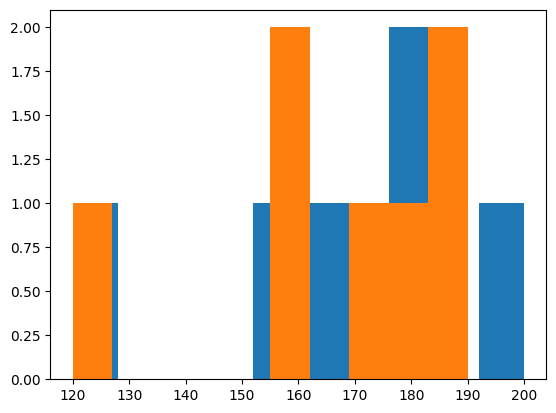

In [90]:
#sns.scatterplot(x = 'price', y = 'city_encoded', hue = 'city', data = df)

import matplotlib.pyplot as plt
plt.hist(df["price"], label="Price")
plt.hist(df['city_encoded'])
#plt.plot(df["city"], df["city_encoded"], label="Encoded Price", marker='o')

In [74]:
sns.load_dataset('tips').head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
